In [1]:
import numpy as np
import pandas as pd

# visualization Library/tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# machine learning algorith
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



from scipy.stats import randint as sp_randint

In [2]:
# import scikit tools to read boston dataset
test = pd.read_csv('Test.csv')
train = pd.read_csv('Train.csv')


In [3]:
#Preview test
test.head(3)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN


In [4]:
train.head(3)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.80573,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes


In [5]:
train.columns

Index(['Applicant_ID', 'form_field1', 'form_field2', 'form_field3',
       'form_field4', 'form_field5', 'form_field6', 'form_field7',
       'form_field8', 'form_field9', 'form_field10', 'form_field11',
       'form_field12', 'form_field13', 'form_field14', 'form_field15',
       'form_field16', 'form_field17', 'form_field18', 'form_field19',
       'form_field20', 'form_field21', 'form_field22', 'form_field23',
       'form_field24', 'form_field25', 'form_field26', 'form_field27',
       'form_field28', 'form_field29', 'form_field30', 'form_field31',
       'form_field32', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field39',
       'form_field40', 'form_field41', 'form_field42', 'form_field43',
       'form_field44', 'form_field45', 'form_field46', 'form_field47',
       'form_field48', 'form_field49', 'form_field50', 'default_status'],
      dtype='object')

In [6]:
# create dictionary of ordinal to integer mapping
ord= {'yes':1, 'no':0 }
# apply using map

train['default_status'] = train.default_status.map(ord)
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,0
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,0
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,1
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,0
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,0


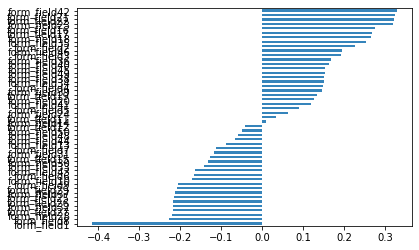

In [7]:
tst = train.corr()['default_status'].copy()
tst = tst.drop('default_status')
tst.sort_values(inplace=True)
tst.plot(kind='barh', alpha = 0.9)

In [8]:
tst


form_field1    -0.414826
form_field8    -0.227655
form_field28   -0.220421
form_field27   -0.218191
form_field32   -0.218091
form_field26   -0.218068
form_field25   -0.215165
form_field37   -0.213527
form_field29   -0.209252
form_field9    -0.206441
form_field10   -0.170323
form_field6    -0.165438
form_field43   -0.165155
form_field33   -0.140934
form_field30   -0.132381
form_field15   -0.127264
form_field31   -0.118339
form_field7    -0.113481
form_field13   -0.089314
form_field44   -0.066595
form_field48   -0.060161
form_field50   -0.049732
form_field12   -0.042858
form_field14    0.008272
form_field11    0.033700
form_field24    0.064261
form_field5     0.088912
form_field41    0.118484
form_field20    0.127612
form_field19    0.134433
form_field39    0.145949
form_field4     0.147548
form_field34    0.151109
form_field38    0.151966
form_field49    0.152407
form_field45    0.154638
form_field40    0.164199
form_field36    0.167306
form_field3     0.193603
form_field46    0.196138


In [9]:
#Making a copy of the training and test data
df_test= test.copy() 
df_train= train.copy()

In [10]:
#drop applicant_ID and Default_status
df_train = df_train.drop(['Applicant_ID'], axis =1)
df_test= df_test.drop(['Applicant_ID'],axis =1)

In [11]:
#check percentage of null values
((df_train.isna().sum()*100)/len(df_train)).sort_values(ascending=False)


form_field40      78.087500
form_field31      70.371429
form_field41      68.266071
form_field11      56.108929
form_field45      55.923214
form_field23      50.219643
form_field30      45.551786
form_field35      41.335714
form_field15      40.133929
form_field48      37.301786
form_field22      36.428571
form_field46      28.400000
form_field21      28.310714
form_field8       23.857143
form_field6       23.857143
form_field24      23.744643
form_field16      23.278571
form_field17      19.912500
form_field50      19.742857
form_field18      18.575000
form_field12      17.669643
form_field27      16.605357
form_field9       14.300000
form_field26      13.282143
form_field13      10.516071
form_field32       9.732143
form_field37       9.732143
form_field25       9.732143
form_field44       9.612500
form_field7        9.219643
form_field39       7.519643
form_field2        6.864286
form_field1        4.516071
form_field36       3.562500
form_field42       2.362500
form_field33       2

In [12]:
#drop MRG because it contains a single Unique value
#drop ZONE1 and ZONE2 because it contains too much missing values
df_train.drop(['form_field40','form_field31','form_field41','form_field11'], axis =1, inplace = True)
df_test.drop(['form_field40','form_field31','form_field41', 'form_field11'], axis =1, inplace = True)

In [13]:
df_train.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,0
1,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,0
2,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,1079864.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,1
3,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,0
4,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,0


In [14]:
df_train.groupby(['form_field14']).sum()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field39,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,default_status
form_field14,,,,,,,,,,,,,,,,,,,,,
0,5012780.0,414.19220,938.5976,663.2190,1847.4102,1.409513e+09,1.558255e+10,5.581216e+09,2.974787e+10,2.896391e+10,...,60.0,353.521839,10919.11,768.519832,40.0,50.0,4.866197e+08,1008.977256,2.699149e+10,148
389,85824.0,6.59585,51.9920,24.7284,135.7290,9.833531e+06,1.052673e+08,6.096291e+07,3.617980e+08,2.082737e+08,...,8.0,19.816544,133.32,11.281536,0.0,2.0,1.163035e+06,37.070454,7.409423e+05,7
1167,158292.0,9.95230,49.8762,22.9302,157.1346,5.213028e+07,1.100225e+09,1.834956e+08,6.853386e+08,1.410418e+09,...,5.0,19.717841,254.52,25.577872,2.0,1.0,3.466650e+06,25.020084,4.871013e+05,17
1556,3226.0,0.17505,5.5440,0.0000,21.8610,0.000000e+00,0.000000e+00,0.000000e+00,2.359285e+06,0.000000e+00,...,0.0,0.799997,0.00,0.000000,0.0,0.0,0.000000e+00,3.340617,1.515276e+03,1
4279,3096.0,0.21455,5.6610,13.7790,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.670842e+06,...,0.0,1.008337,2.02,0.000000,0.0,1.0,0.000000e+00,0.000000,0.000000e+00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133305554200,3484.0,0.14660,0.0816,0.0000,0.0000,8.558000e+03,1.804182e+06,2.011130e+05,2.508933e+07,4.885451e+06,...,0.0,0.189651,9.09,0.649768,0.0,0.0,7.577483e+02,1.849112,1.882092e-04,0
154215019960,3180.0,0.14380,4.7990,13.1742,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,1.099314e+06,0.000000e+00,...,0.0,0.794442,0.00,0.000000,0.0,1.0,0.000000e+00,0.000000,7.128451e-06,0
166211294099,3370.0,0.27650,0.6184,0.0000,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,1.100000,1.01,0.800000,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0


In [15]:
df_train['form_field14'] = np.where(df_train.form_field14 ==0, 389, df_train.form_field14)

In [16]:
#check percentage of null values
((df_train.isna().sum()*100)/len(df_train)).sort_values(ascending=False)


form_field45      55.923214
form_field23      50.219643
form_field30      45.551786
form_field35      41.335714
form_field15      40.133929
form_field48      37.301786
form_field22      36.428571
form_field46      28.400000
form_field21      28.310714
form_field8       23.857143
form_field6       23.857143
form_field24      23.744643
form_field16      23.278571
form_field17      19.912500
form_field50      19.742857
form_field18      18.575000
form_field12      17.669643
form_field27      16.605357
form_field9       14.300000
form_field26      13.282143
form_field13      10.516071
form_field25       9.732143
form_field32       9.732143
form_field37       9.732143
form_field44       9.612500
form_field7        9.219643
form_field39       7.519643
form_field2        6.864286
form_field1        4.516071
form_field36       3.562500
form_field42       2.362500
form_field33       2.242857
form_field43       1.014286
form_field38       0.633929
form_field4        0.633929
form_field28       0

In [17]:
df_train.dtypes

form_field1       float64
form_field2       float64
form_field3       float64
form_field4       float64
form_field5       float64
form_field6       float64
form_field7       float64
form_field8       float64
form_field9       float64
form_field10      float64
form_field12      float64
form_field13      float64
form_field14        int64
form_field15      float64
form_field16      float64
form_field17      float64
form_field18      float64
form_field19      float64
form_field20      float64
form_field21      float64
form_field22      float64
form_field23      float64
form_field24      float64
form_field25      float64
form_field26      float64
form_field27      float64
form_field28      float64
form_field29      float64
form_field30      float64
form_field32      float64
form_field33      float64
form_field34      float64
form_field35      float64
form_field36      float64
form_field37      float64
form_field38      float64
form_field39      float64
form_field42      float64
form_field43

In [18]:
# convert form_field14 from interger to float
df_train['form_field14'] = df_train['form_field14'].astype(float)

In [19]:
### Outlier Identification
#Q1 = df_train.quantile(0.25)
#Q3 = df_train.quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)

In [20]:
# identifying outlier skewness


df_skew= pd.DataFrame({'test':df_test.skew(), 'train':df_train.skew()})
df_skew

,test,train
default_status,NaN,1.186399
form_field1,0.106462,0.120458
form_field10,7.712529,18.007423
form_field12,7.248238,4.734462
form_field13,26.590741,53.667658
form_field14,87.269522,118.547478
form_field15,7.152106,5.533132
form_field16,3.762989,3.999875
form_field17,3.877657,5.044450
form_field18,3.860387,4.966005


In [21]:
df_train.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field39,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,default_status
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,...,51789.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04,56000.000000
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,...,0.090849,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05,0.244911
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,...,0.423802,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06,0.430038
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,...,0.000000,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02,0.000000
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,...,0.000000,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01,0.000000
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552e+07,1.326101e+07,...,0.000000,0.628573,10.100000,0.753840,0.000000,0.000000,1.153022e+03,1.181754,4.993370e-01,0.000000
max,3900.000000,18.015050,57.371600,91.672200,407.748600,5.313546e+07,2.158794e+09,1.037397e+08,3.200533e+08,2.191361e+09,...,21.000000,2.200000,91.910000,0.800000,5.000000,5.000000,5.321014e+07,28.000000,2.307571e+08,1.000000


In [22]:

#df_train['form_field13']= df_train['form_field13'].apply(lambda i: np.log(i) if i > 0 else 0) 
#df_test['form_field13']= df_test['form_field13'].apply(lambda i: np.log(i) if i > 0 else 0)
df_train['form_field13']= np.log1p(df_train['form_field13'])
df_test['form_field13']= np.log1p(df_test['form_field13'])

#df_train['form_field24']= df_train['form_field24'].apply(lambda i: np.log(i) if i > 0 else 0) 
#df_test['form_field24']= df_test['form_field24'].apply(lambda i: np.log(i) if i > 0 else 0)
df_train['form_field24']= np.log1p(df_train['form_field24'])
df_test['form_field24']= np.log1p(df_test['form_field24'])

#df_train['form_field48']= df_train['form_field48'].apply(lambda i: np.log(i) if i > 0 else 0) 
#df_test['form_field48']= df_test['form_field48'].apply(lambda i: np.log(i) if i > 0 else 0)
df_train['form_field48']= np.log1p(df_train['form_field48'])
df_test['form_field48']= np.log1p(df_test['form_field48'])


#df_train['form_field50']= df_train['form_field50'].apply(lambda i: np.log(i) if i > 0 else 0) 
#df_test['form_field50']= df_test['form_field50'].apply(lambda i: np.log(i) if i > 0 else 0)
df_train['form_field50']= np.log1p(df_train['form_field50'])
df_test['form_field50']= np.log1p(df_test['form_field50'])





In [23]:
df_skew= pd.DataFrame({'test':df_test.skew(), 'train':df_train.skew()})
df_skew

,test,train
default_status,NaN,1.186399
form_field1,0.106462,0.120458
form_field10,7.712529,18.007423
form_field12,7.248238,4.734462
form_field13,-1.421678,-1.406572
form_field14,87.269522,118.547478
form_field15,7.152106,5.533132
form_field16,3.762989,3.999875
form_field17,3.877657,5.044450
form_field18,3.860387,4.966005


In [24]:
tst = df_train.corr()['default_status'].copy()
tst= tst.drop('default_status')
tst.sort_values(inplace=True)
tst

form_field1    -0.414826
form_field8    -0.227655
form_field28   -0.220421
form_field27   -0.218191
form_field32   -0.218091
form_field26   -0.218068
form_field25   -0.215165
form_field37   -0.213527
form_field29   -0.209252
form_field48   -0.206604
form_field9    -0.206441
form_field13   -0.195519
form_field10   -0.170323
form_field6    -0.165438
form_field43   -0.165155
form_field33   -0.140934
form_field30   -0.132381
form_field15   -0.127264
form_field7    -0.113481
form_field50   -0.080535
form_field44   -0.066595
form_field12   -0.042858
form_field14    0.008272
form_field5     0.088912
form_field20    0.127612
form_field19    0.134433
form_field39    0.145949
form_field4     0.147548
form_field34    0.151109
form_field38    0.151966
form_field49    0.152407
form_field45    0.154638
form_field36    0.167306
form_field3     0.193603
form_field46    0.196138
form_field2     0.226313
form_field24    0.251179
form_field35    0.254479
form_field18    0.265692
form_field17    0.269507


In [25]:
df_train.form_field47.nunique()
df_train.form_field47.head()

#Return the column namesn with object datatype
obj_dtype= df_train.select_dtypes(include=['object']).columns
obj_dtype

#Encode all categorical variables
df_train =pd.get_dummies(df_train, columns= obj_dtype)
df_test = pd.get_dummies(df_test, columns= obj_dtype)
df_train.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,default_status,form_field47_charge,form_field47_lending
0,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,...,2.02,0.711632,0.0,0.0,NaN,1.129518,0.043380,0,1,0
1,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,...,8.08,0.183584,NaN,0.0,5.860233,1.620483,0.279476,0,1,0
2,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,1079864.0,...,18.18,0.791136,0.0,0.0,NaN,1.513370,0.011572,1,1,0
3,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,...,2.02,0.685168,NaN,0.0,4.510201,0.664452,0.079484,0,1,0
4,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,...,12.12,0.438168,0.0,0.0,4.593983,1.427891,0.044619,0,1,0


In [26]:
features = df_train.select_dtypes(exclude = object).columns.drop(['default_status'])
for col in features:
    df_train[col].fillna(-999, inplace = True)
    df_test[col].fillna(-999, inplace = True)

In [27]:
#fill NA with mean() of each column in  dataset
df_train1 = df_train.copy()
df_test1 = df_test.copy()


In [28]:
# binarize colum 14 into 3 categories- Poor,average, rich

df_train1['form_field14']= pd.qcut(df_train1['form_field14'],3, labels = ['poor','avg','rich'])
df_test1['form_field14']= pd.qcut(df_test1['form_field14'],3, labels = ['poor','avg','rich'])
df_train1['form_field14']


#Encode all categorical variables
df_train1 =pd.get_dummies(df_train1, columns=['form_field14'], )
df_test1 = pd.get_dummies(df_test1, columns= ['form_field14'],   )
df_train1.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field46,form_field48,form_field49,form_field50,default_status,form_field47_charge,form_field47_lending,form_field14_poor,form_field14_avg,form_field14_rich
0,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,...,0.0,-999.000000,1.129518,0.043380,0,1,0,0,0,1
1,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,...,0.0,5.860233,1.620483,0.279476,0,1,0,0,1,0
2,3276.0,0.53845,3.1510,0.0,6.282,-999.0,956940.0,-999.0,192944.0,1079864.0,...,0.0,-999.000000,1.513370,0.011572,1,1,0,1,0,0
3,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,...,0.0,4.510201,0.664452,0.079484,0,1,0,0,0,1
4,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,...,0.0,4.593983,1.427891,0.044619,0,1,0,0,1,0


In [29]:
tst1 = df_train1.corr()['default_status'].copy()
tst1= tst1.drop('default_status')
tst1.sort_values(inplace=True)
tst1

form_field32           -0.254526
form_field25           -0.252104
form_field8            -0.238216
form_field26           -0.237164
form_field27           -0.234193
form_field9            -0.228493
form_field47_lending   -0.227926
form_field28           -0.219221
form_field18           -0.218131
form_field45           -0.216687
form_field17           -0.213428
form_field16           -0.207761
form_field24           -0.207026
form_field29           -0.205897
form_field6            -0.173197
form_field10           -0.169563
form_field37           -0.167874
form_field50           -0.141254
form_field1            -0.140965
form_field21           -0.135646
form_field39           -0.128859
form_field7            -0.120380
form_field14_rich      -0.118804
form_field15           -0.117442
form_field13           -0.112662
form_field44           -0.112267
form_field30           -0.101069
form_field48           -0.091614
form_field12           -0.088259
form_field46           -0.073562
form_field

In [30]:
col1 = tst[tst <0]

print(col1)

form_field1    -0.414826
form_field8    -0.227655
form_field28   -0.220421
form_field27   -0.218191
form_field32   -0.218091
form_field26   -0.218068
form_field25   -0.215165
form_field37   -0.213527
form_field29   -0.209252
form_field48   -0.206604
form_field9    -0.206441
form_field13   -0.195519
form_field10   -0.170323
form_field6    -0.165438
form_field43   -0.165155
form_field33   -0.140934
form_field30   -0.132381
form_field15   -0.127264
form_field7    -0.113481
form_field50   -0.080535
form_field44   -0.066595
form_field12   -0.042858
Name: default_status, dtype: float64


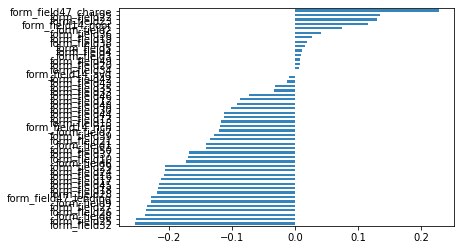

In [31]:
tst2 = df_train1.corr()['default_status'].copy()
tst2 = tst2.drop('default_status')
tst2.sort_values(inplace=True)
tst2.plot(kind='barh', alpha = 0.9)

In [32]:
tst2.sort_values(inplace=True)

tst2

form_field32           -0.254526
form_field25           -0.252104
form_field8            -0.238216
form_field26           -0.237164
form_field27           -0.234193
form_field9            -0.228493
form_field47_lending   -0.227926
form_field28           -0.219221
form_field18           -0.218131
form_field45           -0.216687
form_field17           -0.213428
form_field16           -0.207761
form_field24           -0.207026
form_field29           -0.205897
form_field6            -0.173197
form_field10           -0.169563
form_field37           -0.167874
form_field50           -0.141254
form_field1            -0.140965
form_field21           -0.135646
form_field39           -0.128859
form_field7            -0.120380
form_field14_rich      -0.118804
form_field15           -0.117442
form_field13           -0.112662
form_field44           -0.112267
form_field30           -0.101069
form_field48           -0.091614
form_field12           -0.088259
form_field46           -0.073562
form_field

In [33]:
df_train1 = df_train1.drop(['form_field32','form_field25','form_field8',
                            'form_field14_rich','form_field47_lending'],1)

df_test1 = df_test1.drop(['form_field32','form_field25','form_field8',
                          'form_field14_rich','form_field47_lending'],1)



In [34]:
df_train1.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field9,form_field10,form_field12,...,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,default_status,form_field47_charge,form_field14_poor,form_field14_avg
count,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,...,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000
mean,3288.988125,-68.061282,-5.287392,-5.486368,-4.389031,4.752342e+05,6.232170e+06,1.127799e+07,1.178069e+07,2.281290e+06,...,-95.519653,-558.640946,-283.647714,-368.754173,-5.290536,-196.675412,0.244911,0.649518,0.395482,0.271339
std,950.560828,252.735737,79.400587,79.418227,80.131613,1.278889e+06,1.833216e+07,1.888158e+07,2.662648e+07,4.257190e+06,...,294.636580,496.023149,450.532984,486.135716,79.391884,397.946237,0.430038,0.477125,0.488958,0.444655
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.000000,0.000000,0.000000
25%,3336.000000,0.047700,0.000000,0.000000,0.000000,0.000000e+00,3.248150e+05,4.217732e+05,4.170080e+05,1.205900e+04,...,0.349148,-999.000000,-999.000000,-999.000000,0.000000,0.007475,0.000000,0.000000,0.000000,0.000000
50%,3474.000000,0.226700,0.060000,0.000000,0.000000,4.006700e+04,2.174704e+06,3.712227e+06,3.641234e+06,7.037010e+05,...,0.548080,-999.000000,0.000000,3.959124,0.000000,0.091667,0.000000,1.000000,0.000000,0.000000
75%,3610.000000,0.675700,1.270800,0.000000,0.000000,3.023502e+05,6.335740e+06,1.403308e+07,1.315909e+07,2.677098e+06,...,0.739474,0.000000,0.000000,6.235770,1.158480,0.322083,0.000000,1.000000,1.000000,1.000000
max,3900.000000,18.015050,57.371600,91.672200,407.748600,5.313546e+07,2.158794e+09,3.200533e+08,2.191361e+09,1.240439e+08,...,0.800000,5.000000,5.000000,17.789760,28.000000,19.256876,1.000000,1.000000,1.000000,1.000000


## Modelling

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier



In [36]:
X = df_train1.drop('default_status', axis = 1)
y = df_train1['default_status']


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, random_state = 1234)

#Observing the dimension
X_train.shape, y_train.shape, X_test.shape, y_test.shape



((11200, 44), (11200,), (44800, 44), (44800,))

In [37]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler, RobustScaler
rc = RobustScaler()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [38]:
#A simple loop to help pick an algorithm

seed = 7
models = []
#models.append(('Lr', LogisticRegression()))
#models.append(('RFA', RandomForestClassifier()))
models.append(('gbm', GradientBoostingClassifier()))
#models.append(('Decision_Tree', DecisionTreeClassifier()))
models.append(('xgb', XGBClassifier(n_estimators = 50)))
models.append(('Catboost', CatBoostClassifier(silent = True)))
#models.append(('LGBM', LGBMClassifier(silent = True)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    model.fit(X_train, y_train)
    score = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    results.append(score)
    names.append(name)
    msg = "%s: %f " % (name, score)
    print(msg)

gbm: 0.830583 
xgb: 0.817173 
Catboost: 0.831908 


In [39]:
features1 = df_train1.select_dtypes(exclude = object).columns.drop(['default_status'])

In [40]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss

def metric(y,pred):
    return roc_auc_score(y, pred, labels = [0,1])

 


# I will not perform any preprocessing steps for categorical variable
categorical_features_indices = np.where(X.dtypes != np.float)[0]
categorical_features_indices 


error_list = []
test_pred = []

#specify no of folds
n_skf=10
seed = 2020

## Manually tweak the hyperparameter, learning rate and n_estimators especially
params = {'n_estimators': 4000,
          'learning_rate': 0.007,
          'objective': 'CrossEntropy',
          'eval_metric':'AUC',
          'random_seed': seed,
          'use_best_model': True,}

kf = StratifiedKFold(n_splits = n_skf, shuffle = True,random_state = 1234)
i=1

score_list = []
score = 0
test_oofs = []

for i, (tr_idx, vr_idx) in enumerate(kf.split(X, y)):
    
    xtrain, ytrain = X.loc[tr_idx, features1], y.loc[tr_idx]
    xval, yval = X.loc[vr_idx, features1], y.loc[vr_idx]

    model = CatBoostClassifier(**params)
    model.fit(xtrain, ytrain, 
              eval_set=[(xval,yval)],        
              early_stopping_rounds = 6000,
              cat_features = categorical_features_indices,
              verbose =100)
    
    p = model.predict_proba(xval)[:, 1]
    sc = metric(yval, p)
    score_list.append(sc)
    score += sc/n_skf
    
    pred = model.predict_proba(df_test1[features1])[:, 1]
    test_oofs.append(pred)

    print('Fold {} : {}'.format(i, sc))

print()
print()
print('Avg log : ', score)



0:	test: 0.7850269	best: 0.7850269 (0)	total: 137ms	remaining: 9m 8s
100:	test: 0.8214707	best: 0.8214707 (100)	total: 13.9s	remaining: 8m 58s
200:	test: 0.8245371	best: 0.8245371 (200)	total: 27.5s	remaining: 8m 39s
300:	test: 0.8267066	best: 0.8267066 (300)	total: 43.1s	remaining: 8m 49s
400:	test: 0.8282243	best: 0.8282243 (400)	total: 59.4s	remaining: 8m 52s
500:	test: 0.8296262	best: 0.8296262 (500)	total: 1m 13s	remaining: 8m 36s
600:	test: 0.8306865	best: 0.8306865 (600)	total: 1m 27s	remaining: 8m 13s
700:	test: 0.8317746	best: 0.8317746 (700)	total: 1m 40s	remaining: 7m 53s
800:	test: 0.8327442	best: 0.8327479 (799)	total: 1m 53s	remaining: 7m 34s
900:	test: 0.8335147	best: 0.8335147 (900)	total: 2m 7s	remaining: 7m 17s
1000:	test: 0.8340342	best: 0.8340342 (1000)	total: 2m 20s	remaining: 7m 2s
1100:	test: 0.8347313	best: 0.8347313 (1100)	total: 2m 34s	remaining: 6m 46s
1200:	test: 0.8351206	best: 0.8351208 (1199)	total: 2m 47s	remaining: 6m 30s
1300:	test: 0.8355257	best: 0.8

2400:	test: 0.8390127	best: 0.8390182 (2306)	total: 5m 19s	remaining: 3m 32s
2500:	test: 0.8390979	best: 0.8391279 (2469)	total: 5m 32s	remaining: 3m 19s
2600:	test: 0.8391004	best: 0.8391311 (2535)	total: 5m 45s	remaining: 3m 5s
2700:	test: 0.8391198	best: 0.8391513 (2671)	total: 5m 58s	remaining: 2m 52s
2800:	test: 0.8392343	best: 0.8392343 (2800)	total: 6m 12s	remaining: 2m 39s
2900:	test: 0.8392122	best: 0.8392395 (2803)	total: 6m 25s	remaining: 2m 26s
3000:	test: 0.8392226	best: 0.8392488 (2923)	total: 6m 38s	remaining: 2m 12s
3100:	test: 0.8392205	best: 0.8392488 (2923)	total: 6m 51s	remaining: 1m 59s
3200:	test: 0.8392855	best: 0.8392912 (3178)	total: 7m 4s	remaining: 1m 45s
3300:	test: 0.8392389	best: 0.8393083 (3227)	total: 7m 17s	remaining: 1m 32s
3400:	test: 0.8392005	best: 0.8393083 (3227)	total: 7m 30s	remaining: 1m 19s
3500:	test: 0.8392415	best: 0.8393083 (3227)	total: 7m 43s	remaining: 1m 6s
3600:	test: 0.8392239	best: 0.8393083 (3227)	total: 7m 56s	remaining: 52.8s
370

500:	test: 0.8302473	best: 0.8302473 (500)	total: 1m 6s	remaining: 7m 45s
600:	test: 0.8315106	best: 0.8315106 (600)	total: 1m 19s	remaining: 7m 30s
700:	test: 0.8326806	best: 0.8326806 (700)	total: 1m 32s	remaining: 7m 15s
800:	test: 0.8336320	best: 0.8336320 (800)	total: 1m 45s	remaining: 7m
900:	test: 0.8344257	best: 0.8344257 (900)	total: 1m 57s	remaining: 6m 45s
1000:	test: 0.8350777	best: 0.8350777 (1000)	total: 2m 10s	remaining: 6m 31s
1100:	test: 0.8356995	best: 0.8356995 (1100)	total: 2m 23s	remaining: 6m 18s
1200:	test: 0.8361856	best: 0.8361856 (1200)	total: 2m 36s	remaining: 6m 4s
1300:	test: 0.8365899	best: 0.8365899 (1300)	total: 2m 49s	remaining: 5m 50s
1400:	test: 0.8369660	best: 0.8369719 (1398)	total: 3m 2s	remaining: 5m 38s
1500:	test: 0.8372853	best: 0.8372875 (1496)	total: 3m 15s	remaining: 5m 24s
1600:	test: 0.8376961	best: 0.8376961 (1600)	total: 3m 27s	remaining: 5m 11s
1700:	test: 0.8380785	best: 0.8380862 (1699)	total: 3m 40s	remaining: 4m 58s
1800:	test: 0.83

2900:	test: 0.8343461	best: 0.8345581 (2057)	total: 6m 27s	remaining: 2m 26s
3000:	test: 0.8342640	best: 0.8345581 (2057)	total: 6m 40s	remaining: 2m 13s
3100:	test: 0.8341716	best: 0.8345581 (2057)	total: 6m 53s	remaining: 1m 59s
3200:	test: 0.8340968	best: 0.8345581 (2057)	total: 7m 7s	remaining: 1m 46s
3300:	test: 0.8340073	best: 0.8345581 (2057)	total: 7m 21s	remaining: 1m 33s
3400:	test: 0.8339678	best: 0.8345581 (2057)	total: 7m 34s	remaining: 1m 20s
3500:	test: 0.8338718	best: 0.8345581 (2057)	total: 7m 48s	remaining: 1m 6s
3600:	test: 0.8338125	best: 0.8345581 (2057)	total: 8m 2s	remaining: 53.5s
3700:	test: 0.8337589	best: 0.8345581 (2057)	total: 8m 15s	remaining: 40.1s
3800:	test: 0.8336951	best: 0.8345581 (2057)	total: 8m 29s	remaining: 26.7s
3900:	test: 0.8337149	best: 0.8345581 (2057)	total: 8m 43s	remaining: 13.3s
3999:	test: 0.8337299	best: 0.8345581 (2057)	total: 8m 56s	remaining: 0us

bestTest = 0.8345581035
bestIteration = 2057

Shrink model to first 2058 iterations.


In [41]:
#Increase in local cv score should probably lead to increase in Leaderboard score
f"{n_skf} fold CV, score: {score}" 


'10 fold CV, score: 0.8406179461144158'

In [42]:
oof_prediction = pd.DataFrame(test_oofs).T

In [43]:
oof_prediction.columns = ['fold_'+ str(i) for i in range(1, n_skf + 1)]

In [44]:
oof_prediction.head()

,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,fold_7,fold_8,fold_9,fold_10
0,0.335611,0.324729,0.323272,0.302017,0.317287,0.315739,0.321602,0.333472,0.294922,0.304560
1,0.434831,0.390255,0.398102,0.412086,0.404186,0.427830,0.364221,0.390991,0.361869,0.302121
2,0.410754,0.409534,0.391080,0.392808,0.383923,0.400486,0.361149,0.390594,0.388060,0.390877
3,0.802959,0.769058,0.739846,0.762179,0.762916,0.776075,0.745039,0.748160,0.764588,0.771833
4,0.206246,0.191708,0.188930,0.217241,0.191568,0.187649,0.227190,0.229321,0.171012,0.179953


In [45]:

df_cbr= {'Applicant_ID': test['Applicant_ID'], 'default_status': pred}
sub = pd.DataFrame(data=df_cbr)
sub = sub[['Applicant_ID', 'default_status']]
sub['default_status'] = np.mean(test_oofs, axis = 0) 
sub.to_csv('subdatasubadv5_cv=10.csv', index = False)

In [46]:
sub['default_status'] = np.mean(test_oofs, axis = 0) 